# GlyCONFORMER Tutorial

This tutorial will teach you the usage of GlyCONFORMER for two user cases. Either you can perform the analysis for a glycan in our library, in which case you only have to provide a file containing the torsion angle values of each linkage recorded over time.
Or you perform the whole analysis on the data you provide for a customized glycan, requiring not only a file with torsion angle records but also the free energy profiles as a text file of each torsion angle as well as information about your angle labelling and so on. 

In [1]:
from glyconformer.lib import glyconformer

Invoking __init__.py for glyconformer


## The conformer string

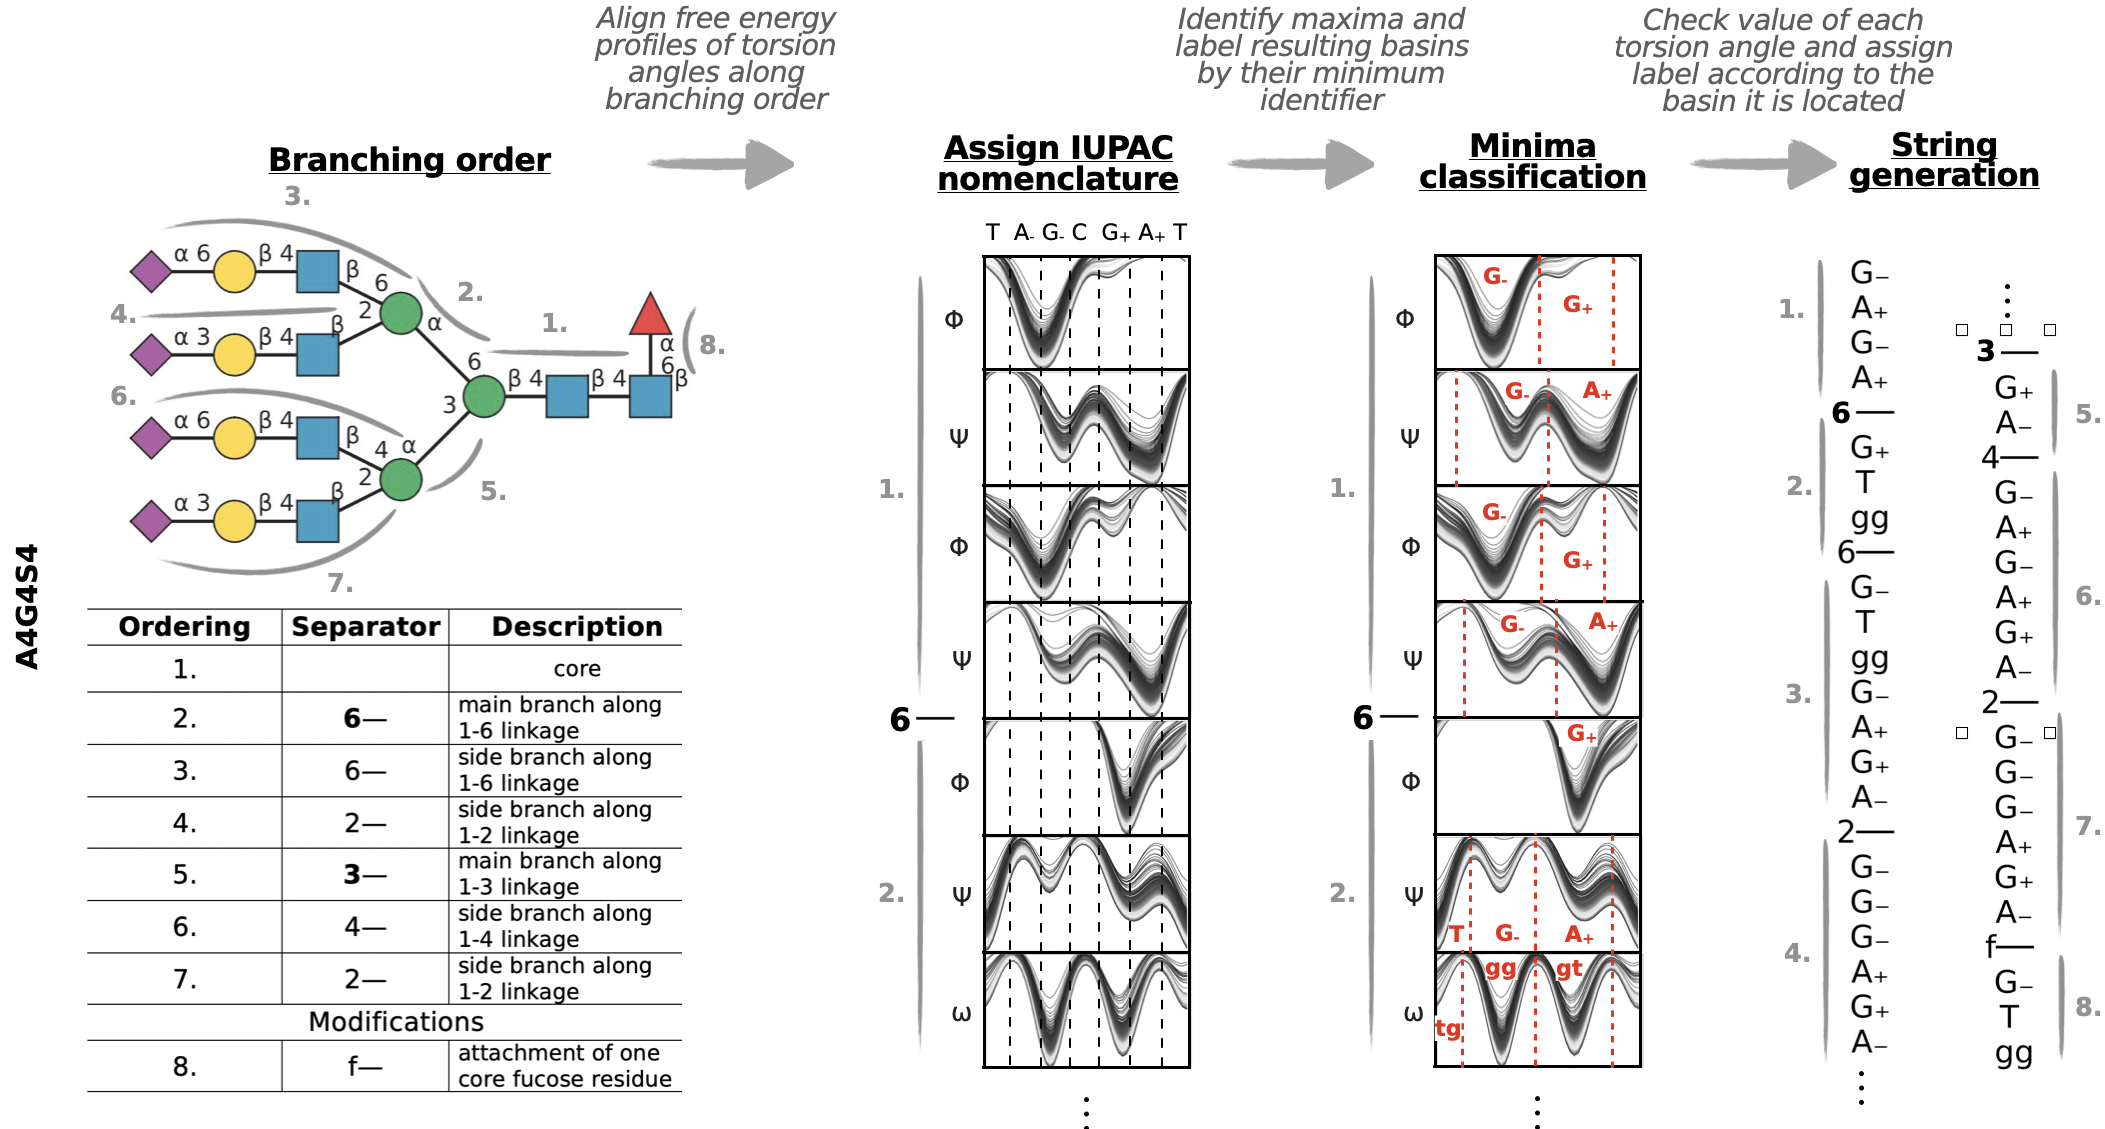

In [2]:
from IPython.display import Image
Image("Conformer_string.png")

In a glycan, each glycosidic linkage gives rise to at least two torsion angles (φ and ψ), while 1→6 and 2→6 linkages harbor an additional torsion angle ω. These structural characteristics can be used to construct an unambiguous labeling scheme in order to distinguish different conformers of the same glycan. Each conformer is identified by a digit string of length $N_z$, equal to the number of torsion angles in the glycan. For N-glycans, the string begins at the free reducing end, consisting of a β 1 → 4 - linked GlcNAc dimer followed by a mannose residue. For each linkage, the linear string reports digits assigned to φ, ψ and ω (if applicable), in this order. In correspondence of a junction (leading e.g. to an α 1→6 and a α 1→3 branch after the first mannose), a string separator is introduced, labeled according to the C atom at the branch origin (e.g. 6– for 1→6 linkages). The string continues first along the branch of the higher C atom (6 in our case) until reaching the terminal residue, prior to returning to the last junction and following the branch of the next-lower C atom (3 in our case). Additional modifications like the attachment of fucose residues or bisecting GlcNAc residues are included after all other branches are assigned. The separators of primary branches are labelled with bold numbers (6– or 3–), for clarity. The string digits indicate in which intervals of values the torsion angle lies, following the IUPAC nomenclature for dihedrals. 

Namely, the digits for φ and ψ and the corresponding interval of radian values are :
* C = [−0.52, +0.52)
* G+ = [+0.52, +1.57)
* A+ = [+1.57, +2.62)
* T = [+2.62, π] or [−π, −2.62) A− = [−2.62, −1.57)
* G− = [−1.57, −0.52)

The digits for ω are:
* gg = [−2.62, 0)
* gt = [0, 2.62)
* tg = [2.62, π] or [−π, −2.62)

The assignment of each torsion angle to a given interval is performed in the following way. First, the free-energy profile associated with rotation along the torsion angle is calculated from an MD trajectory (most often enhanced sampling MD is necessary in order to achieve converged profiles). The positions of the free-energy minima are then labeled according to the nomenclature above. All angle values belonging to the same free-energy basin (around a minimum between the two neighboring maxima) are finally labeled equally to the mini-
mum of their basin.

## Analysing a glycan with default settings from the LIBRARY

The first two examples display the usage of our glycan library, where the user only has to provide a file with torsion angles recorded for a specific glycan. The _inputfile_ is required to habor a matrix of shape $n_{samples} \times n_{features}$, where $n_{features}$ are equal to all torsion angles of the respective glycan and $n_{samples}$ the number of samples/frames recorded. Labelling of columns according to the naming convention described in the "info.dat" file stored in the **LIBRARY_GLYCANS** directory for each glycantype is required in the input file. The input file can be a standard text file as well as an output COLVAR file from the PLUMED package. Additional columns like indeces, times and so on will be deleted upon the read-in process.

### M5 --> minimal example with standard settings

/home/grothaus-2/Documents/Simulations/Sugar/models/GlyCONFORMER_github/glyconformer/lib.py:58: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(self.inputfile)


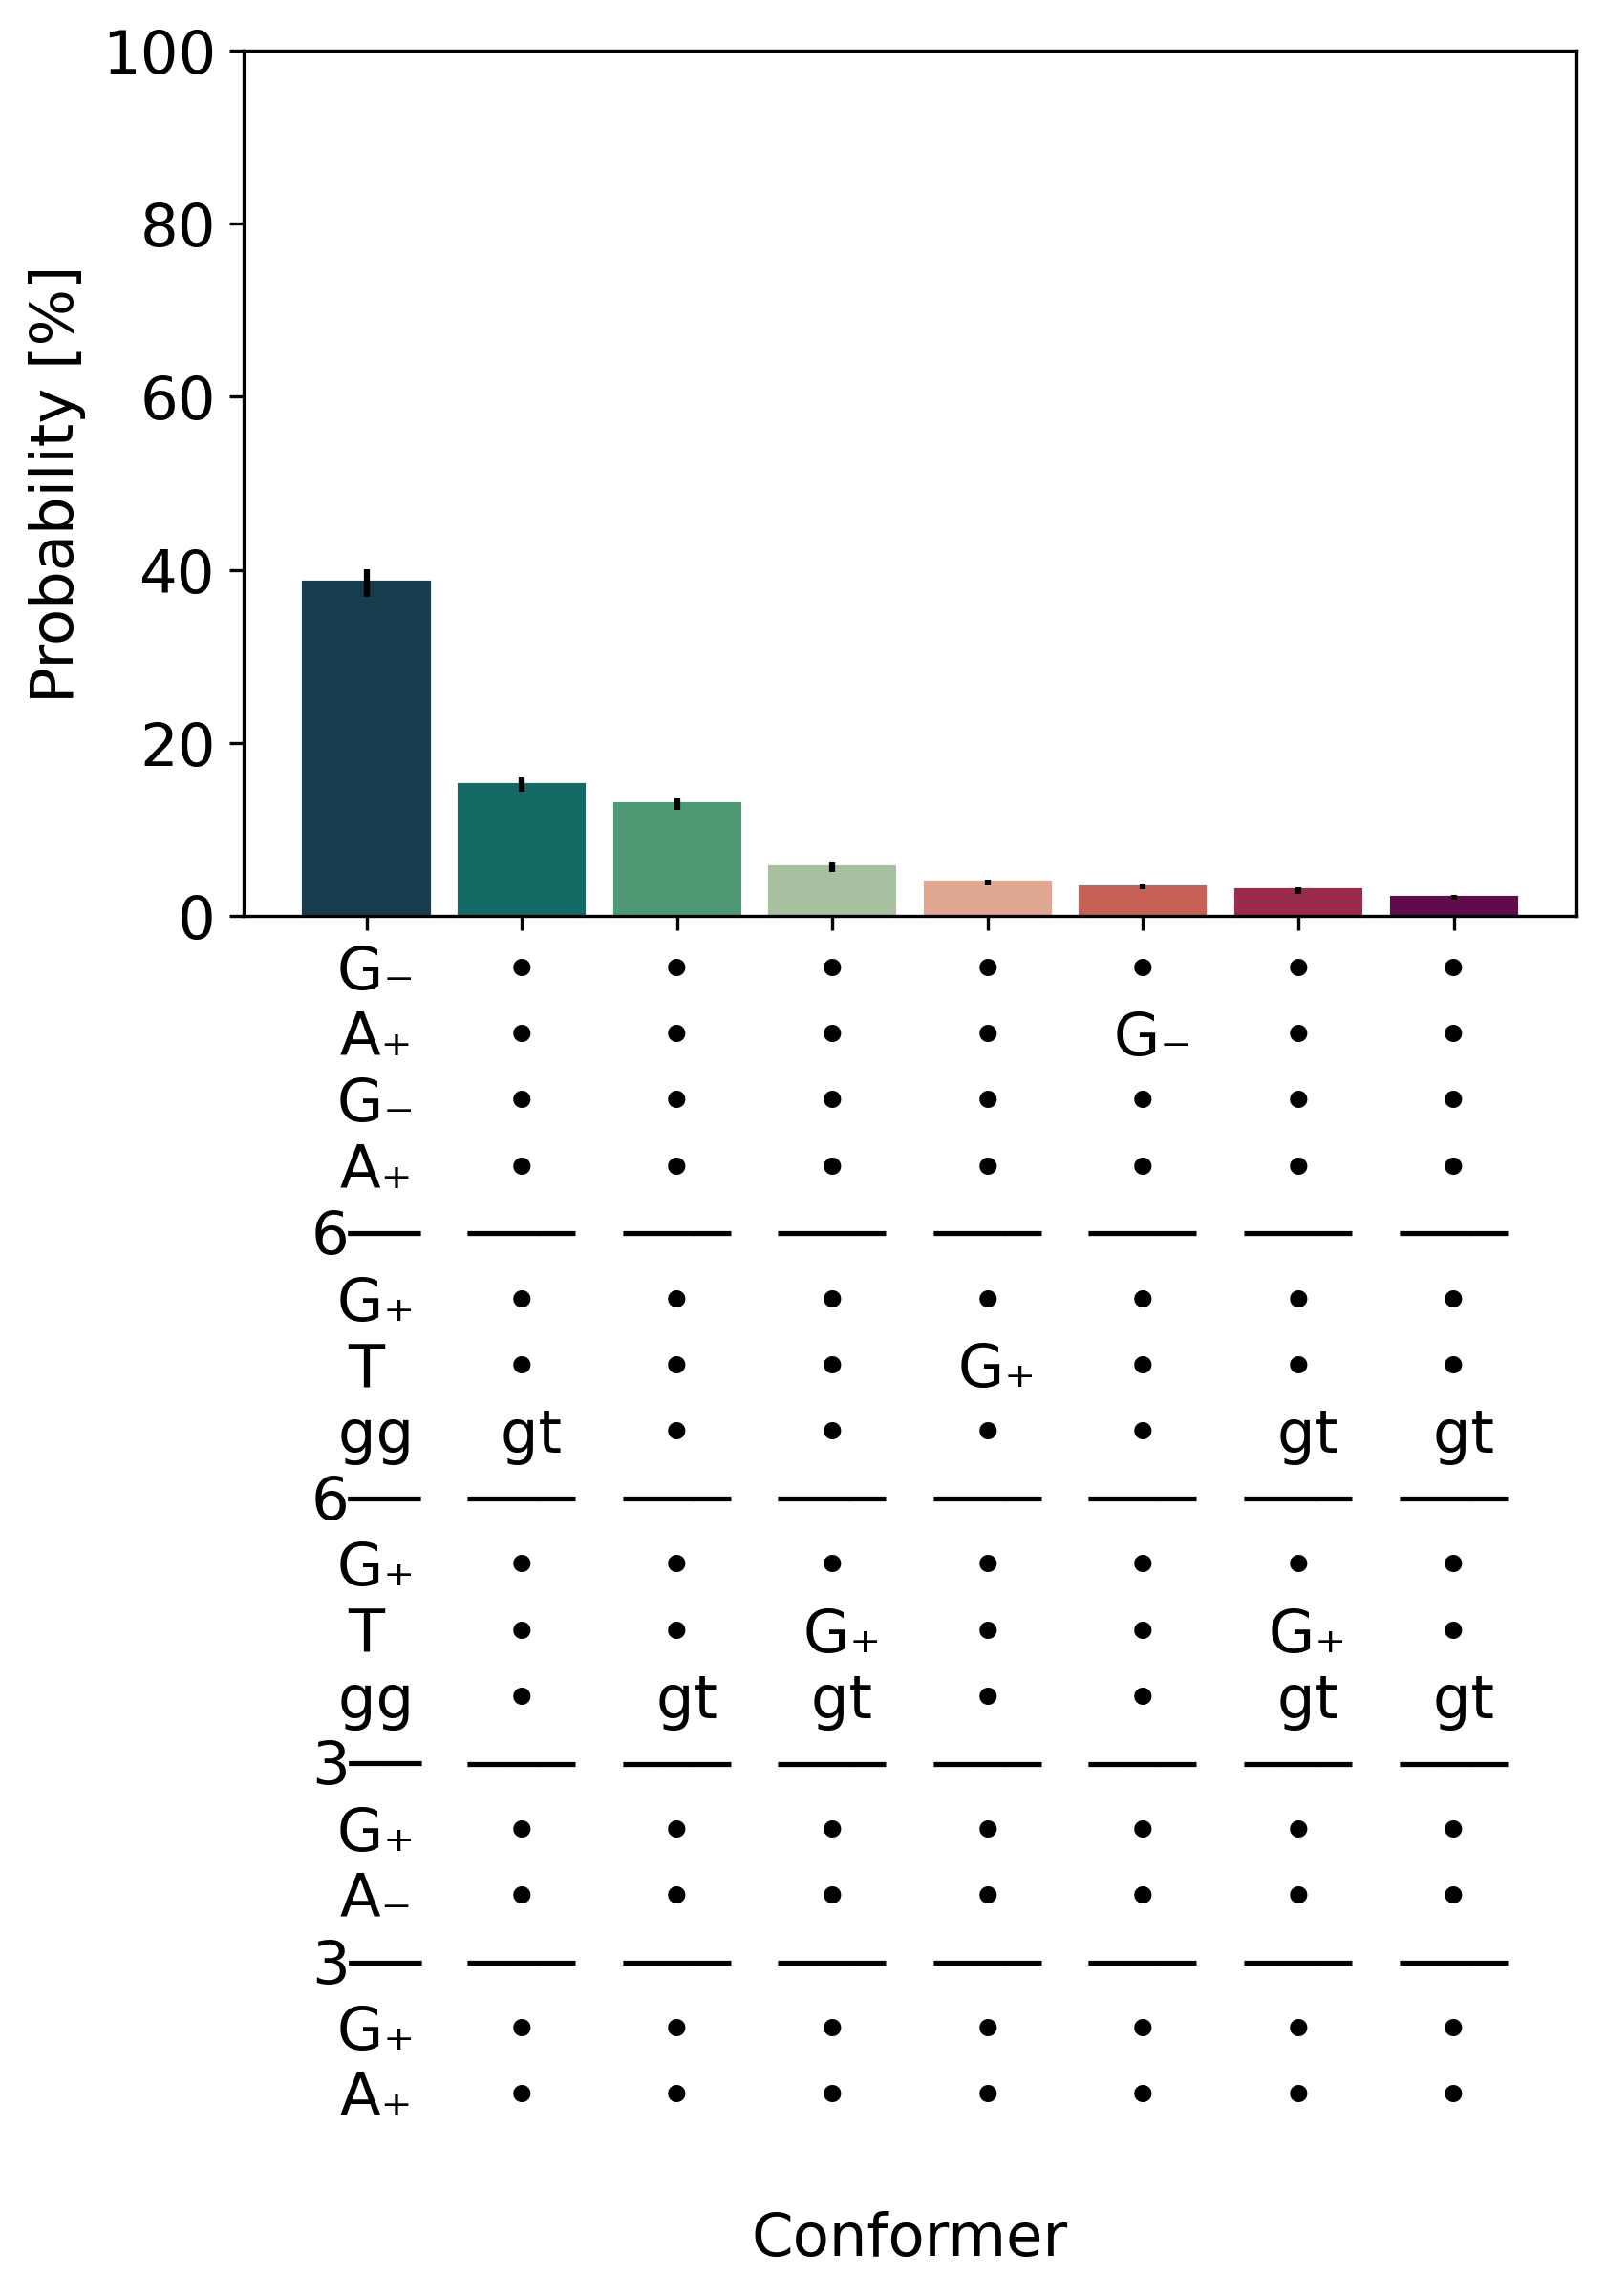

In [8]:
conformer = glyconformer(
    inputfile = "TUTORIAL/M5_example/M5_angles.dat", 
    glycantype = "M5", 
    outputdir = "TUTORIAL/M5_example"
)
binary, population = conformer.run()
conformer.plot()

### FM5 --> elaborate example with customized settings + output options

**Store input options on variable _conformer_**

In [7]:
conformer = glyconformer(
    inputfile = "TUTORIAL/FM5_example/FM5_angles.dat", 
    glycantype = "FM5", 
    outputdir = "TUTORIAL/FM5_example", 
    length = 5000
)

**Accessible settings that are read from your input and the LIBRARY_GLYCAN directory for the specific glycantype:**

* **Input file:** File with angles values for each linkage  
(Mandatory)
* **Glycan type:** Selected glycan type  
(Required if type from library should be used. Check **LIBRARY_GLYCAN** for available glycan parameters)
* **Output directory:** Directory where created files are stored  
(Default: "./")
* **List of angles:** List of torsion angle names, order determines also occurance in conformer string  
(Default: read from "angles.dat" file under **LIBRARY_GLYCAN** and defined glycan type)
* **List of omega angles:** List of omega torsion angle names, required because omega angles get a different labelling  
(Default: read from "angles_omega.dat" file under **LIBRARY_GLYCAN** and defined glycan type)
* **Length of input file:** Desired length of inputfile  
(Default: original length of input file)
* **List of separators:** List of separators to use in conformer string  
(Default: read from "separator.dat" file under **LIBRARY_GLYCAN** and defined glycan type)
* **List of position for separators:** List of positions to insert the separators in the conformer string  
(Default: read from "separator.dat" file under **LIBRARY_GLYCAN** and defined glycan type)
* **Directory that includes fep files:** Directory that stores free energy profile files for each torsion angle  
(Default: read from **LIBRARY_GLYCAN** and defined glycan type)

In [10]:
print(
"Input file: "+conformer.inputfile+"\n"+  
"Glycan type: "+conformer.glycantype+"\n"+ 
"Output directory: "+conformer.outputdir+"\n"+  
"List of angles: "+str(conformer.angles)+"\n"+  
"List of omega angles: "+str(conformer.omega_angles)+"\n"+  
"Length of input file: "+str(conformer.length)+"\n"+  
"List of separators: "+str(conformer.separator)+"\n"+ 
"List of position for separators: "+str(conformer.separator_index)+"\n"+  
"Directory that includes fep files: "+str(conformer.fepdir)  
)

Input file: TUTORIAL/FM5_example/FM5_angles.dat
Glycan type: FM5
Output directory: TUTORIAL/FM5_example
List of angles: ['phi1_2', 'psi1_2', 'phi2_3', 'psi2_3', 'phi3_5', 'psi3_5', 'omega3_5', 'phi5_7', 'psi5_7', 'omega5_7', 'phi5_6', 'psi5_6', 'phi3_4', 'psi3_4', 'phi1_8', 'psi1_8', 'omega1_8']
List of omega angles: ['omega3_5', 'omega5_7', 'omega1_8']
Length of input file: 5000
List of separators: ['6──', '6──', '3──', '3──', 'f──']
List of position for separators: [4, 7, 10, 12, 14]
Directory that includes fep files: LIBRARY_GLYCANS/FM5


**Print the content of the loaded input file** with desired length

In [ ]:
conformer.colvar 

**Calculate the conformer population for a glycan FM5 using torsion angle values stored in the input file "FM5_angles.dat" and default settings derived from the library.** Reads in the _inputfile_ with torsion angle values stored in each column and replaces each value by the corresponding IUPAC label, determined by the minima it is located in along the respective free energy profiles. Further counts how often a conformer (same letter code) occurs and also splits the torsion angle dataset in 10 blocks to do the conformer labelling and probability calculation for each block. 

**Outputs two dataframes and one file per block:**  
  
**Binary:** Dataframe that is equivilant to _conformer.colvar_ except for torsion angle values being replaced by IUPAC labels and _separator_ inserted.

**Population:** Dataframe that lists the individual conformers and their occurance.  
  
**Files:**  Generates 10 files, one for each block, with the name "Cluster_conformer*.dat" in the _outputdir_ with columns corresponding to the index, the conformer string, the occurence of the conformer within the block, the probability of the conformer within the block and the occurance of the conformer across all blocks.

**_IMPORTANT:_** Make sure that your column names in the _inputfile_ exactly match the names in the list _angles_ and as described in the "info.dat" file stored in the **LIBRARY_GLYCANS** directory for each glycantype. Otherwise the algorithm can not tell which column should be associated to which free energy profile of the library. 

In [15]:
binary, population = conformer.run()

/home/grothaus-2/Documents/Simulations/Sugar/models/GlyCONFORMER_github/glyconformer/lib.py:58: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(self.inputfile)


In [16]:
binary

,phi1_2,psi1_2,phi2_3,psi2_3,sep1,phi3_5,psi3_5,omega3_5,sep2,phi5_7,...,sep3,phi5_6,psi5_6,sep4,phi3_4,psi3_4,sep5,phi1_8,psi1_8,omega1_8
0,G₋,G₋,G₋,A₊,6──,G₊,G₊,gt,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
250,G₋,G₋,G₋,A₊,6──,G₊,G₊,gt,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
500,G₋,G₋,G₋,A₊,6──,G₊,G₊,gt,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
750,G₋,G₋,G₋,A₊,6──,G₊,G₊,gt,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
1000,G₋,A₊,G₋,A₊,6──,G₊,T,gg,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249000,G₋,A₊,G₋,A₊,6──,G₊,G₊,gg,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gg
1249250,G₋,A₊,G₋,A₊,6──,G₊,T,gg,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
1249500,G₋,A₊,G₋,A₊,6──,G₊,T,gg,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gt
1249750,G₋,A₊,G₋,A₊,6──,G₊,T,gg,6──,G₊,...,3──,G₊,A₋,3──,G₊,A₋,f──,G₋,T,gg


In [17]:
population.sort_values("Count",ascending=False)

,Count,Conformer
51,966,G₋ A₊ G₋ A₊6── G₊ T gg6── G₊ T gg3── G₊ A₋3...
52,806,G₋ A₊ G₋ A₊6── G₊ T gg6── G₊ T gg3── G₊ A₋3...
78,495,G₋ A₊ G₋ A₊6── G₊ T gt6── G₊ T gg3── G₊ A₋3...
60,327,G₋ A₊ G₋ A₊6── G₊ T gg6── G₊ T gt3── G₊ A₋3...
79,289,G₋ A₊ G₋ A₊6── G₊ T gt6── G₊ T gg3── G₊ A₋3...
...,...,...
90,1,G₋ A₊ G₋ A₊6── G₊ T tg6── G₊ T gg3── G₊ A₋3...
89,1,G₋ A₊ G₋ A₊6── G₊ T tg6── G₊ G₊ gt3── G₊ A₋3...
87,1,G₋ A₊ G₋ A₊6── G₊ T tg6── G₊ G₊ gg3── G₊ A₋3...
71,1,G₋ A₊ G₋ A₊6── G₊ T gt6── G₊ G₊ gt3── G₊ A₋3...


**Plot the histogram/probability distribiution for glycan FM5.** Shown is the conformer probability for the dataset stored in "FM5_angles.dat", having the conformer string on the x-axis. Reads in "Cluster_conformer*.dat" files created in the block averaging process from the _outputdir_ directory. The average of all blocks  
$\bar{X} = \frac{1}{N} \sum_{j=1}^{N} X_j$  
is calculated over $N = 10$ blocks, where $X_j$ is the average calculated within each $j$th block.
Error bars are calculated as standard deviations of the sampling distribution (standard error of the mean):  
$\mathrm{std}(\bar{X}) = \sqrt{\frac{\mathrm{var}(\bar{X})}{N}}$,  
with the variance of the sampling distribution  
$\mathrm{var}(\bar{X}) = (\frac{N}{N-1})\left[ \frac{1}{N} \sum_{j=1}^{N} X_j^2 - (\frac{1}{N} \sum_{j=1}^{N} X_j)^2 \right] $.

**User-specified input variables:**

* **threshold**: Histogram threshold in percentage for displaying and outputting conformer populations (Default: 2%)
* **ymax**: Change y-axis range (Default 100)
* **size**: modify size of text labels (Default 15)
* **colors**: list of colors for bars (Default ["#173c4d","#146b65","#4e9973","#a7c09f","#dfa790","#c76156","#9a2b4c","#600b4a"])
* **dpi**: define the figure resolution (Default 300)

In [ ]:
conformer.plot(threshold=1,ymax=30, size=10, colors=["darkblue"] * 30, dpi=500)

**Plot the utilized free energy profiles of each torsion angle from the LIBRARY_GLYCANS directory.** Only necessary if you are interested in how the profiles differ depending on the chemical environment and what is the basis for the conformer label.

In [ ]:
conformer.validate_fep()

## Analysing a glycan from scratch

### A2G2S2 --> using self-produced free energy profile files

**Notes:** The list of angles is required to be in the correct order for the conformer string generation. How columns are arranged in the inputfile does not matter as they are sorted according to the order in the _angles_ list. The _fepdir_ is required to contain one file per torsion angle with the specific name: fes_{anglename}.dat, where _anglename_ is the name of the angle as stated in the _angles_ list and referred from there. Column names in the _inputfile_ require to have the same angle names as given in the _angles_ list, whereby the order of columns does not matter as it is rearraged to meet the order of the _angles_ list. The individual fes files (simple text files) contain two columns $[x,y]$, where $x$ ranges from $-pi$ to $pi$ and $y$ holding the corresponding free energy values. The number of rows can be arbitraty. The $order\_min$ and $order\_max$ values are required for the $argrelextrema$ function, calculating the relative extrema of our free energy data. Values between $5-7$ have worked fine so far. See [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html) for its documentation for more information.  
  
For examplary **fes_*.dat** files checkout the directory: "**LIBRARY_GLYCANS/A2G2S2_example**"

**Store input options on variable _conformer_**

In [4]:
conformer = glyconformer(
    inputfile =        "TUTORIAL/A2G2S2_example/A2G2S2_angles.dat", 
    outputdir=         "TUTORIAL/A2G2S2_example", 
    angles=           ["phi1_2","psi1_2","phi2_3", "psi2_3","phi3_8","psi3_8","omega3_8",
                       "phi8_9","psi8_9","phi9_10","psi9_10","phi10_11","psi10_11",
                       "omega10_11","phi3_4","psi3_4","phi4_5","psi4_5","phi5_6","psi5_6",
                       "phi6_7","psi6_7","omega6_7"], 
    omega_angles=     ["omega6_7","omega3_8","omega10_11"], 
    length=           10056,
    separator=        ["6──","3──"],
    separator_index = [4,14],
    fepdir =           "TUTORIAL/A2G2S2_example", 
    order_min =        5, 
    order_max =        5
)

/home/grothaus-2/Documents/Simulations/Sugar/models/GlyCONFORMER_github/glyconformer/lib.py:58: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(self.inputfile)


**Simultaneously the free energy profiles are analyzed and classified.** Upon parameter reading, three directories are created that hold the _minima_ and _maxima_ values of each free energy profile as well as the _label_ of each minima, according to the [IUPAC](https://goldbook.iupac.org/terms/view/T06406) nomenclature for torsion angles:

In [ ]:
conformer.maxima

In [ ]:
conformer.minima

In [ ]:
conformer.label

A validation of free energy profile classification and labelling can be performed visually, by plotting each profile with indicated maxima and minima labels. There should be one letter per minimum. If you see no label for a minimum or two for one minimum, alter your $order\_min$ and $order\_max$ settings.

In [ ]:
conformer.validate_fep()

Running and plotting is performed as above:

/home/grothaus-2/Documents/Simulations/Sugar/models/GlyCONFORMER_github/glyconformer/lib.py:58: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar = plumed.read_as_pandas(self.inputfile)


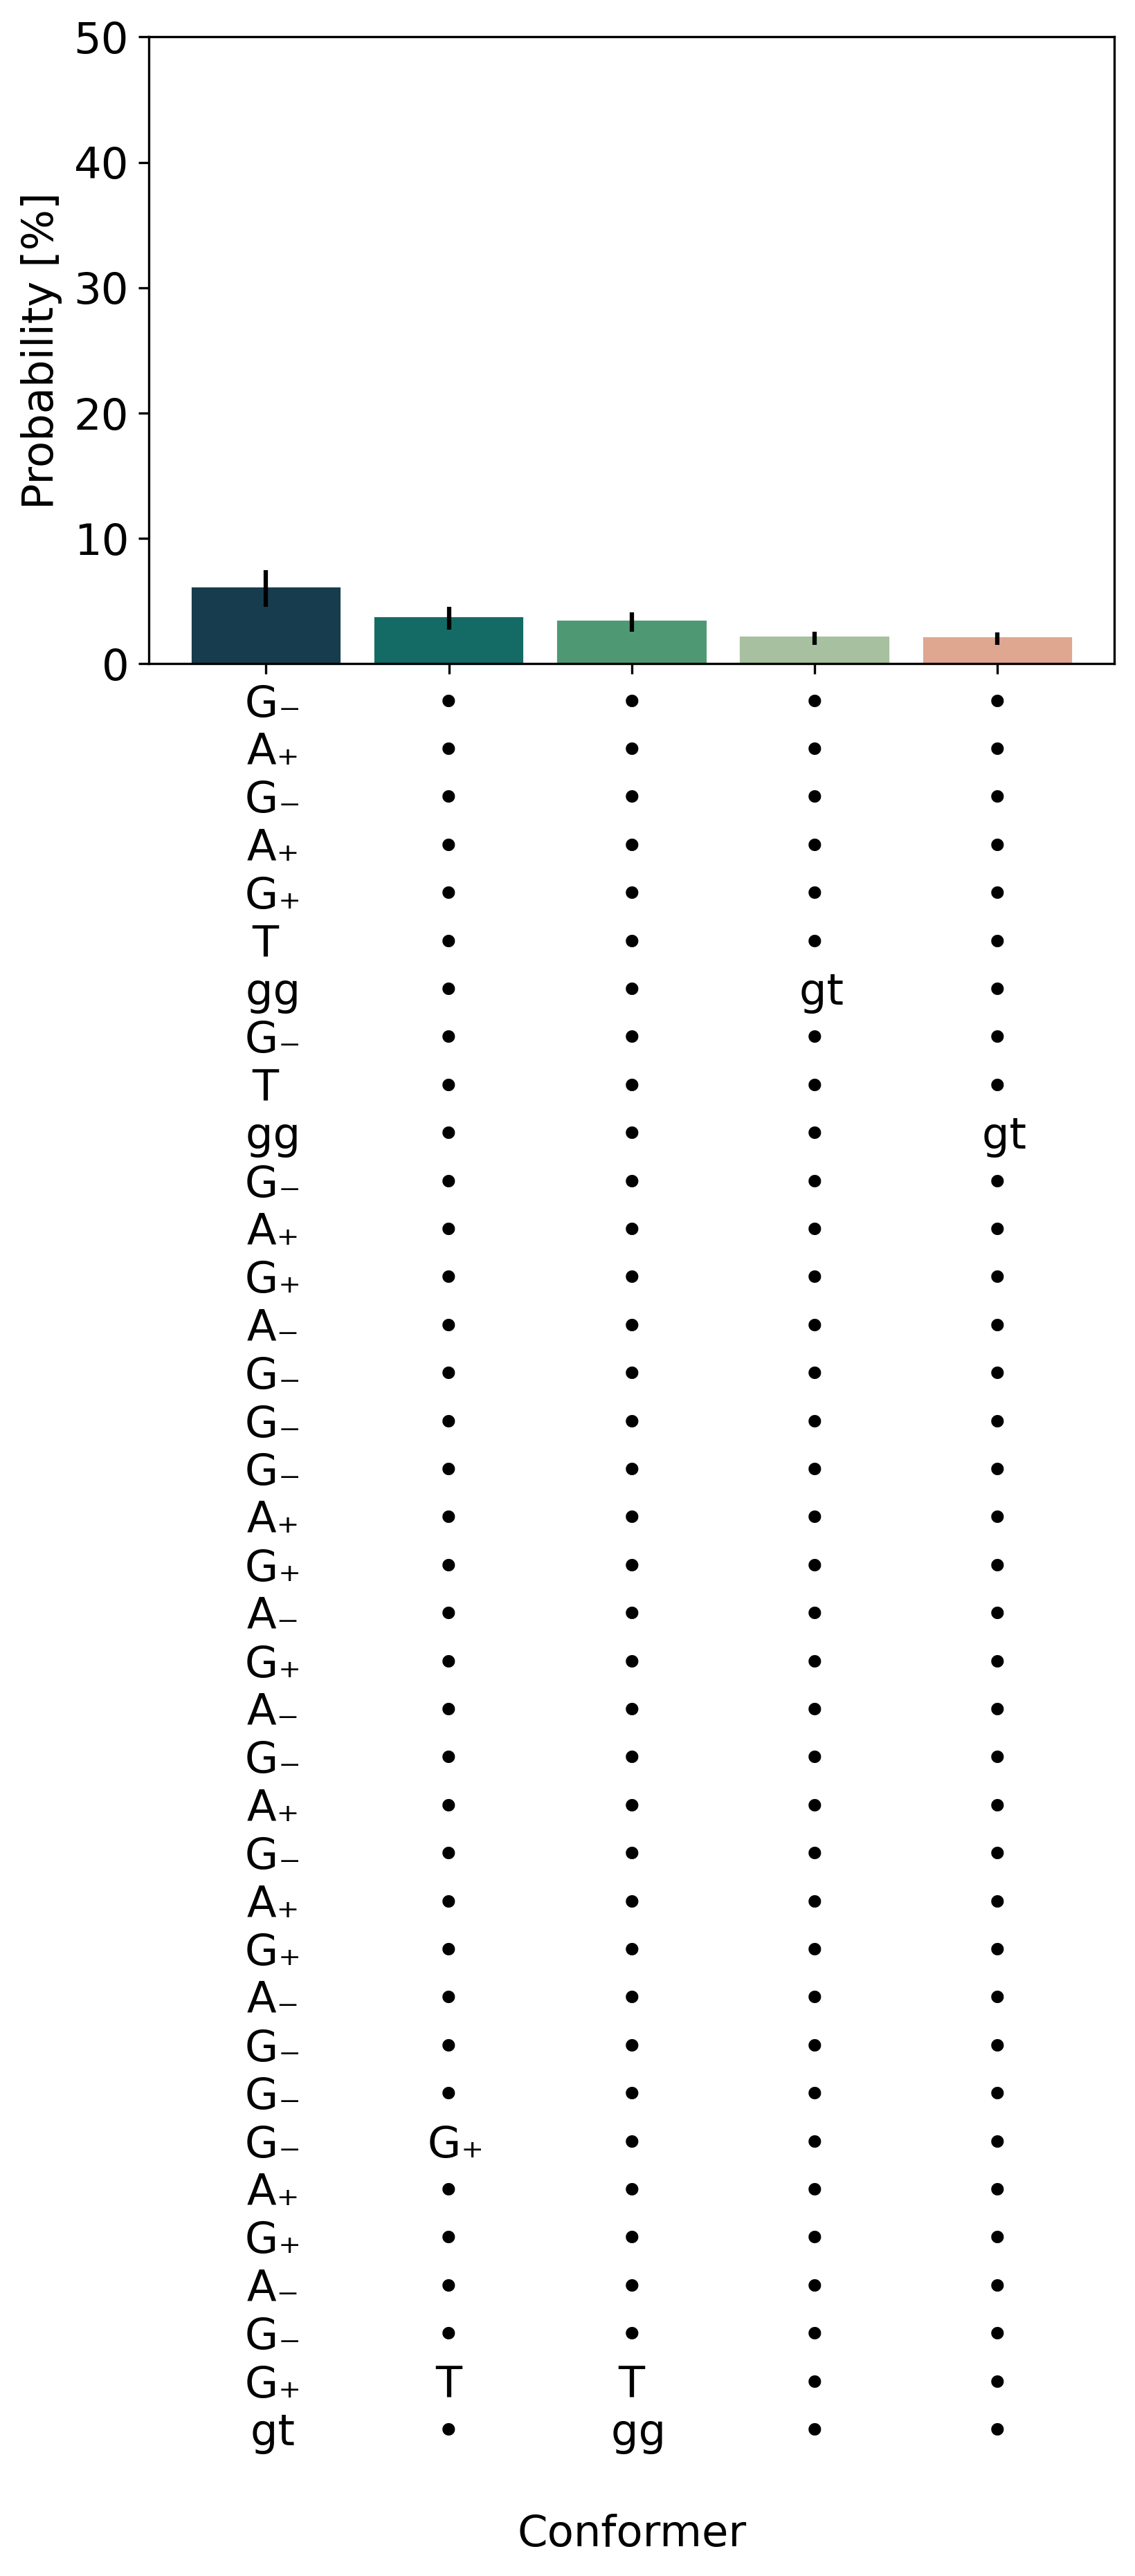

In [3]:
binary, population = conformer.run()
conformer.plot(threshold=2,ymax=50)

## Some important comments:

**length**: The actual length of the input file does sometimes not match the specified length in the input as every $n_{th}$ row is skipped to come as close to the desired length as possible 

**colvar**: The name "colvar" is short for "collective variable" derived from a naming convention in enhanced sampling and more specifically metadynamics. Collective variables are nothing more than the variabels of interest in a system, here the torsion angles. We sometimes refer to input (file) or colvar (file), although they are equivilant here. 